<a href="https://colab.research.google.com/github/tushar-lawande/Machine_Learning_cognifyz_tech_Intership/blob/main/Location_Based_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

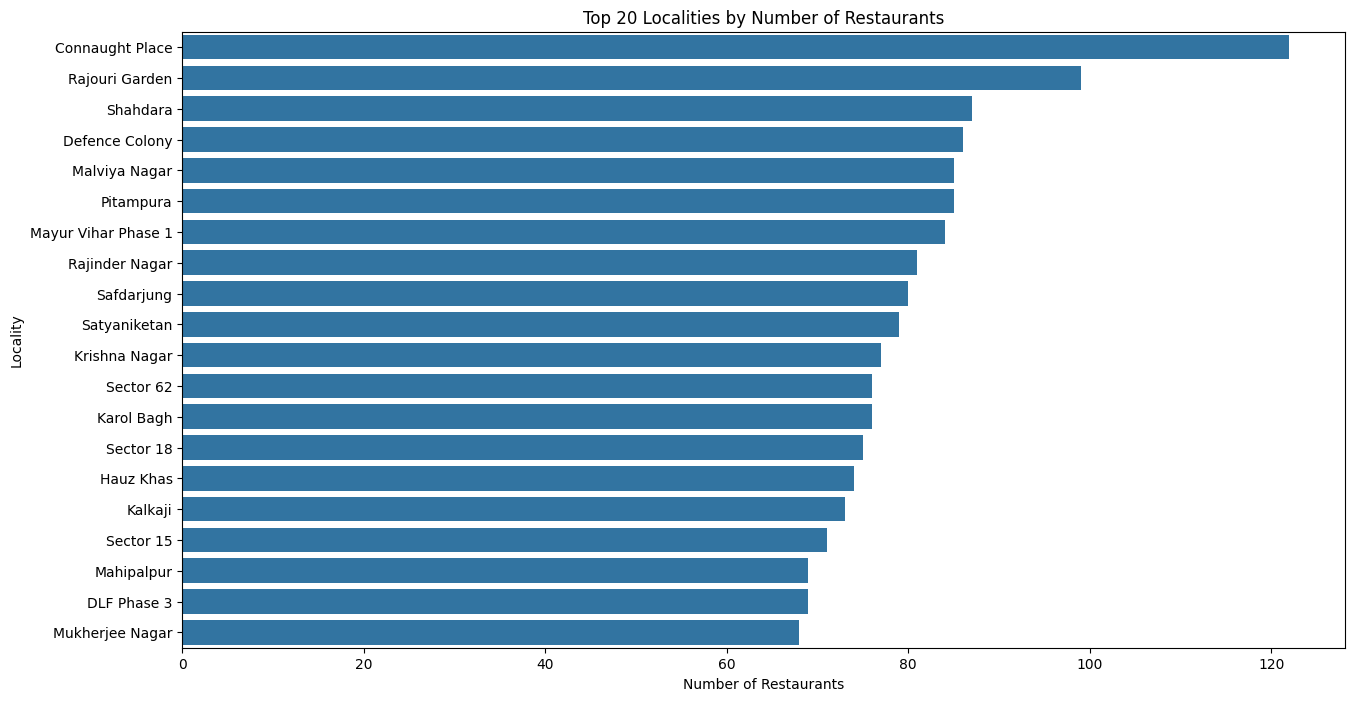

Top Rated Localities:
                              Locality  Average Rating  Average Cost for Two
799                        Pondok Aren             4.9              200000.0
1140       Venetian Village, Al Maqtaa             4.9                 330.0
424   Hotel Clarks Amer, Malviya Nagar             4.9                2000.0
110                              Bebek             4.9                  30.0
244                               DIFC             4.9                 500.0
108                  Beak Street, Soho             4.9                  35.0
1077                 The Milk District             4.9                  25.0
530                            Kenwood             4.9                  10.0
747                               Paia             4.9                  70.0
1044    Taman Impian Jaya Ancol, Ancol             4.9              200000.0
Most Expensive Localities:
                                    Locality  Average Rating  \
439               Hotel Shangri-La, Sudi

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster

# Load the dataset
data = pd.read_csv('/content/Dataset .csv')

# Step 1: Visualize the distribution of restaurants on a map
map_center = [data['Latitude'].mean(), data['Longitude'].mean()]
restaurant_map = folium.Map(location=map_center, zoom_start=12)
marker_cluster = MarkerCluster().add_to(restaurant_map)

for idx, row in data.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['Restaurant Name']
    ).add_to(marker_cluster)

restaurant_map.save('restaurant_distribution_map.html')

# Step 2: Group by city or locality and analyze concentration
restaurant_count_by_locality = data.groupby('Locality')['Restaurant Name'].count().reset_index()
restaurant_count_by_locality.columns = ['Locality', 'Restaurant Count']

plt.figure(figsize=(15, 8))
sns.barplot(x='Restaurant Count', y='Locality', data=restaurant_count_by_locality.sort_values(by='Restaurant Count', ascending=False).head(20))
plt.title('Top 20 Localities by Number of Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('Locality')
plt.show()

# Step 3: Calculate statistics by city or locality
locality_stats = data.groupby('Locality').agg({
    'Aggregate rating': 'mean',
    'Average Cost for two': 'mean'
}).reset_index()

locality_stats.columns = ['Locality', 'Average Rating', 'Average Cost for Two']
locality_stats.head()

# Step 4: Identify insights
top_rated_localities = locality_stats.sort_values(by='Average Rating', ascending=False).head(10)
print("Top Rated Localities:")
print(top_rated_localities)

most_expensive_localities = locality_stats.sort_values(by='Average Cost for Two', ascending=False).head(10)
print("Most Expensive Localities:")
print(most_expensive_localities)
